
Train Set Class Distribution:
attack_category
DoS       234874
Normal     58367
Probe       2464
R2L          676
U2R           31
Name: count, dtype: int64

Train Set Class Percentages:
DoS: 79.24%
Normal: 19.69%
Probe: 0.83%
R2L: 0.23%
U2R: 0.01%

Test Set Class Distribution:
attack_category
DoS       156584
Normal     38911
Probe       1643
R2L          450
U2R           21
Name: count, dtype: int64

Test Set Class Percentages:
DoS: 79.24%
Normal: 19.69%
Probe: 0.83%
R2L: 0.23%
U2R: 0.01%


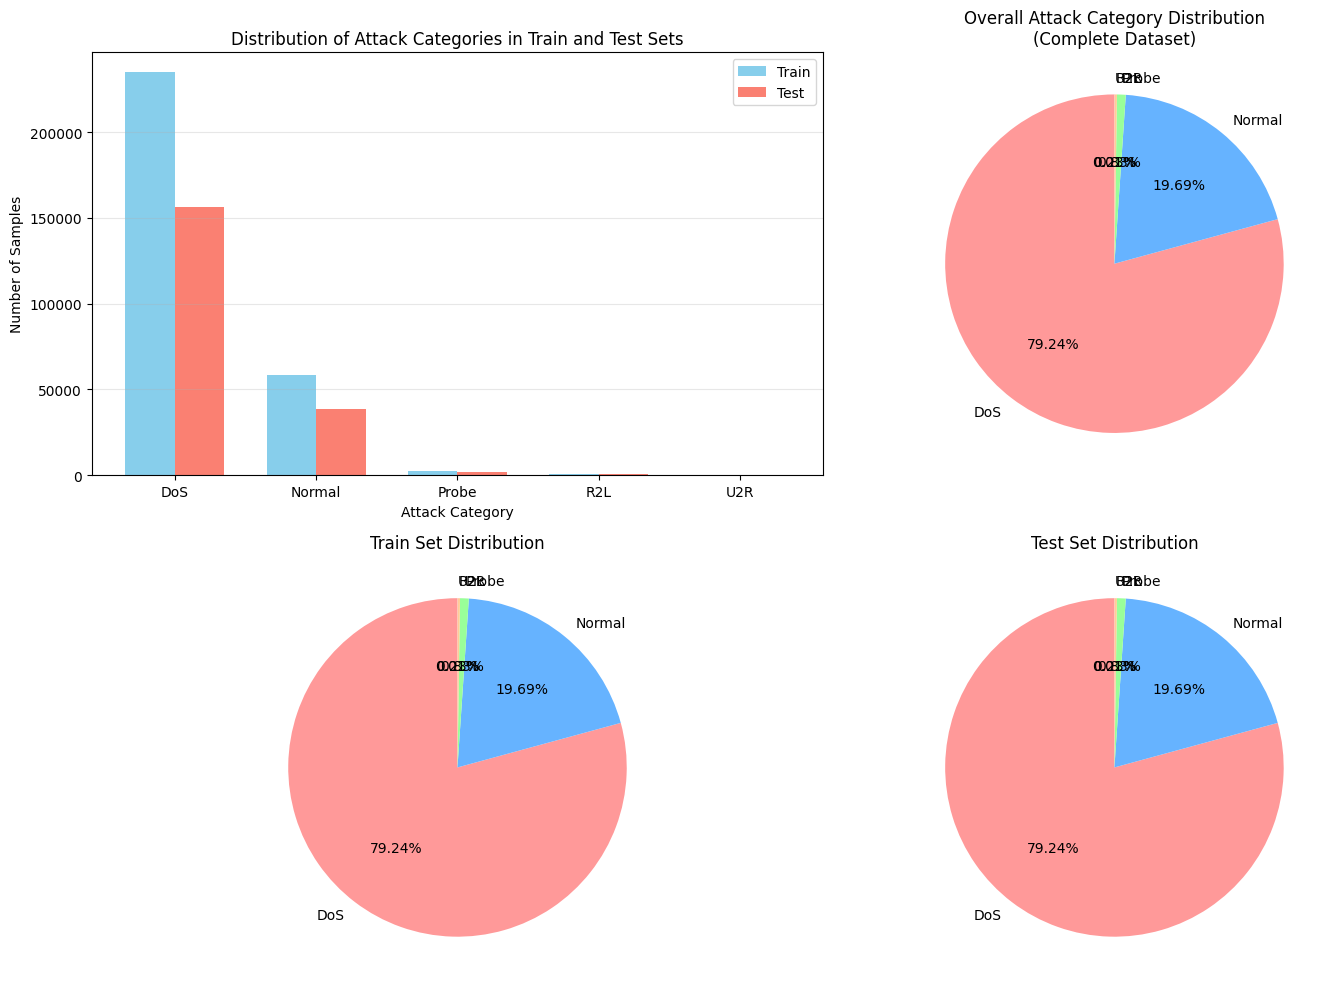


DETAILED CLASS-WISE BREAKDOWN

Overall Dataset (Total: 494,021 samples):
  DoS       :  391,458 samples ( 79.24%)
  Normal    :   97,278 samples ( 19.69%)
  Probe     :    4,107 samples (  0.83%)
  R2L       :    1,126 samples (  0.23%)
  U2R       :       52 samples (  0.01%)

Train Set (Total: 296,412 samples):
  DoS       :  234,874 samples ( 79.24%)
  Normal    :   58,367 samples ( 19.69%)
  Probe     :    2,464 samples (  0.83%)
  R2L       :      676 samples (  0.23%)
  U2R       :       31 samples (  0.01%)

Test Set (Total: 197,609 samples):
  DoS       :  156,584 samples ( 79.24%)
  Normal    :   38,911 samples ( 19.69%)
  Probe     :    1,643 samples (  0.83%)
  R2L       :      450 samples (  0.23%)
  U2R       :       21 samples (  0.01%)

IMBALANCE ANALYSIS

Class Imbalance Ratios (compared to largest class):
  DoS       :      1.0:1
  Normal    :      4.0:1
  Probe     :     95.3:1
  R2L       :    347.7:1
  U2R       :   7528.0:1

Note: Following paper methodology - dup

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Load dataset
col_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

df = pd.read_csv("kddcup.data_10_percent", header=None, names=col_names)

# 2. Strip trailing dot from attack labels
df['label'] = df['label'].str.strip('.')

# 3. Encode categorical columns
label_cols = ['protocol_type', 'service', 'flag']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# 4. Mapping only the 22 attacks
attack_mapping = {
    'neptune': 'DoS', 'back': 'DoS', 'smurf': 'DoS', 'pod': 'DoS',
    'teardrop': 'DoS', 'land': 'DoS',
    'satan': 'Probe', 'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe',
    'guess_passwd': 'R2L', 'ftp_write': 'R2L', 'imap': 'R2L', 'multihop': 'R2L',
    'phf': 'R2L', 'warezmaster': 'R2L', 'warezclient': 'R2L', 'spy': 'R2L',
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R',
    'normal': 'Normal'
}

df['attack_category'] = df['label'].map(attack_mapping)

# 5. Keep only rows where mapping was successful
df = df.dropna(subset=['attack_category'])

# 6. Train-test split (60:40)
X = df.drop(columns=['attack_category', 'label'])
y = df['attack_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# 7. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame with original column names
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# 8. Count records in each category
print("\nTrain Set Class Distribution:")
print(y_train.value_counts())
print("\nTrain Set Class Percentages:")
train_percentages = y_train.value_counts(normalize=True) * 100
for class_name, percentage in train_percentages.items():
    print(f"{class_name}: {percentage:.2f}%")

print("\nTest Set Class Distribution:")
print(y_test.value_counts())
print("\nTest Set Class Percentages:")
test_percentages = y_test.value_counts(normalize=True) * 100
for class_name, percentage in test_percentages.items():
    print(f"{class_name}: {percentage:.2f}%")

# 9. Visualizations
plt.figure(figsize=(15, 10))

# Bar chart
plt.subplot(2, 2, 1)
bar_width = 0.35
categories = y_train.value_counts().index
x = range(len(categories))

plt.bar(x, y_train.value_counts().values, width=bar_width, label='Train', color='skyblue')
plt.bar([i + bar_width for i in x], y_test.value_counts().values, width=bar_width, label='Test', color='salmon')

plt.xticks([i + bar_width / 2 for i in x], categories)
plt.xlabel("Attack Category")
plt.ylabel("Number of Samples")
plt.title("Distribution of Attack Categories in Train and Test Sets")
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Pie chart for overall distribution
plt.subplot(2, 2, 2)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
overall_counts = y.value_counts()
wedges, texts, autotexts = plt.pie(overall_counts.values, 
                                   labels=overall_counts.index, 
                                   autopct='%1.2f%%',
                                   colors=colors,
                                   startangle=90,
                                   textprops={'fontsize': 10})

plt.title("Overall Attack Category Distribution\n(Complete Dataset)")

# Pie chart for train set
plt.subplot(2, 2, 3)
wedges, texts, autotexts = plt.pie(y_train.value_counts().values, 
                                   labels=y_train.value_counts().index, 
                                   autopct='%1.2f%%',
                                   colors=colors,
                                   startangle=90,
                                   textprops={'fontsize': 10})

plt.title("Train Set Distribution")

# Pie chart for test set
plt.subplot(2, 2, 4)
wedges, texts, autotexts = plt.pie(y_test.value_counts().values, 
                                   labels=y_test.value_counts().index, 
                                   autopct='%1.2f%%',
                                   colors=colors,
                                   startangle=90,
                                   textprops={'fontsize': 10})

plt.title("Test Set Distribution")

plt.tight_layout()
plt.show()

# Additional detailed breakdown
print("\n" + "="*60)
print("DETAILED CLASS-WISE BREAKDOWN")
print("="*60)

print(f"\nOverall Dataset (Total: {len(df):,} samples):")
overall_counts = y.value_counts()
for class_name, count in overall_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {class_name:10}: {count:8,} samples ({percentage:6.2f}%)")

print(f"\nTrain Set (Total: {len(y_train):,} samples):")
train_counts = y_train.value_counts()
for class_name, count in train_counts.items():
    percentage = (count / len(y_train)) * 100
    print(f"  {class_name:10}: {count:8,} samples ({percentage:6.2f}%)")

print(f"\nTest Set (Total: {len(y_test):,} samples):")
test_counts = y_test.value_counts()
for class_name, count in test_counts.items():
    percentage = (count / len(y_test)) * 100
    print(f"  {class_name:10}: {count:8,} samples ({percentage:6.2f}%)")

print("\n" + "="*60)
print("IMBALANCE ANALYSIS")
print("="*60)
print("\nClass Imbalance Ratios (compared to largest class):")
max_samples = overall_counts.max()
for class_name, count in overall_counts.items():
    ratio = max_samples / count
    print(f"  {class_name:10}: {ratio:8.1f}:1")

print(f"\nNote: Following paper methodology - duplicates NOT removed")
print(f"Duplicate rows in dataset: {df.duplicated().sum():,} ({df.duplicated().sum()/len(df)*100:.1f}%)")

In [2]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr

# 1. Preprocessing
col_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

df = pd.read_csv("kddcup.data_10_percent", header=None, names=col_names)
df['label'] = df['label'].str.strip('.')
label_cols = ['protocol_type', 'service', 'flag']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
attack_mapping = {
    'neptune': 'DoS', 'back': 'DoS', 'smurf': 'DoS', 'pod': 'DoS',
    'teardrop': 'DoS', 'land': 'DoS', 'satan': 'Probe', 'ipsweep': 'Probe',
    'nmap': 'Probe', 'portsweep': 'Probe', 'guess_passwd': 'R2L', 'ftp_write': 'R2L',
    'imap': 'R2L', 'multihop': 'R2L', 'phf': 'R2L', 'warezmaster': 'R2L',
    'warezclient': 'R2L', 'spy': 'R2L', 'buffer_overflow': 'U2R', 'loadmodule': 'U2R',
    'perl': 'U2R', 'rootkit': 'U2R', 'normal': 'Normal'
}
df['attack_category'] = df['label'].map(attack_mapping)
df = df.dropna(subset=['attack_category'])
X = df.drop(columns=['attack_category', 'label'])
y = df['attack_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# Remove constant features
constant_features = [col for col in X_train.columns if X_train[col].std() == 0]
X_train = X_train.drop(columns=constant_features)
X_test = X_test.drop(columns=constant_features)
feature_names = X_train.columns.tolist()
print("Removed constant features:", constant_features)

# 2. Feature Selection Setup
y_train_encoded = LabelEncoder().fit_transform(y_train)

# 3. IGR Scores (from your WEKA ranking, filtered for non-constant features)
gain_ratio_ranking = {k: v for k, v in {
    "logged_in": 0.6507, "dst_bytes": 0.5108, "num_failed_logins": 0.4845,
    "root_shell": 0.4663, "dst_host_srv_diff_host_rate": 0.4178,
    "is_guest_login": 0.3994, "service": 0.3408, "dst_host_count": 0.3358,
    "srv_diff_host_rate": 0.3329, "src_bytes": 0.2765, "protocol_type": 0.2658,
    "duration": 0.2554, "num_file_creations": 0.242, "dst_host_same_src_port_rate": 0.2338,
    "count": 0.225, "num_root": 0.2151, "num_shells": 0.2063, "num_access_files": 0.2016,
    "su_attempted": 0.1545, "hot": 0.1514, "srv_count": 0.1464, "diff_srv_rate": 0.1198,
    "dst_host_serror_rate": 0.1169, "dst_host_diff_srv_rate": 0.114, "serror_rate": 0.1133,
    "dst_host_srv_count": 0.1106, "dst_host_srv_serror_rate": 0.108, "dst_host_same_srv_rate": 0.1021,
    "srv_serror_rate": 0.0974, "same_srv_rate": 0.0864, "flag": 0.0821,
    "dst_host_srv_rerror_rate": 0.0784, "dst_host_rerror_rate": 0.0763, "rerror_rate": 0.0705,
    "num_compromised": 0.0468, "srv_rerror_rate": 0.0407, "wrong_fragment": 0.0331,
    "urgent": 0, "num_outbound_cmds": 0, "land": 0, "is_host_login": 0
}.items() if k not in constant_features}

# 4. CFS with IGR Prioritization
def cfs_with_igr_prioritization(corr_matrix, target_corrs, gain_ratio_ranking, k=13, threshold=0.9):
    selected_features = []
    igr_top_k = sorted(gain_ratio_ranking.items(), key=lambda x: x[1], reverse=True)[:k]
    igr_features = [f[0] for f in igr_top_k if f in feature_names]
    
    for feature in igr_features:
        idx = feature_names.index(feature)
        if all(abs(corr_matrix[idx, feature_names.index(f)]) < threshold or f == feature 
               for f in selected_features if f in feature_names):
            selected_features.append(feature)
    
    remaining_igr = [f for f, _ in sorted(gain_ratio_ranking.items(), key=lambda x: x[1], reverse=True)
                    if f not in selected_features and f in feature_names]
    while len(selected_features) < k and remaining_igr:
        next_feature = remaining_igr[0]
        idx = feature_names.index(next_feature)
        if all(abs(corr_matrix[idx, feature_names.index(f)]) < threshold or f == next_feature 
               for f in selected_features if f in feature_names):
            selected_features.append(next_feature)
        remaining_igr.pop(0)
    
    return selected_features[:k]

# 5. Ensemble Feature Selection with Minority Class Focus
# Calculate target correlations
target_corrs = []
for col in X_train.columns:
    if X_train[col].isnull().any() or ~np.isfinite(X_train[col]).all():
        print(f"Warning: {col} contains NaN or infinite values, skipping correlation.")
        continue
    corr, _ = pearsonr(X_train[col], y_train_encoded)
    target_corrs.append((col, abs(corr)))

target_corrs.sort(key=lambda x: x[1], reverse=True)
print("Top 10 Target Correlations:", target_corrs[:10])

# Precompute correlation matrix
corr_matrix = X_train.corr().values
corr_matrix = np.nan_to_num(corr_matrix, nan=0.0)  # Handle NaNs
print("Correlation Matrix Shape:", corr_matrix.shape)
print("Correlation computation done.")

# Random Forest Importance with parallel processing
rf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train_encoded)
rf_importance = dict(zip(X_train.columns, rf.feature_importances_))
print("Random Forest Importances (Top 10):", {k: v for k, v in sorted(rf_importance.items(), key=lambda x: x[1], reverse=True)[:10]})

# Vectorized minority impact calculation
minority_classes = ['U2R', 'R2L', 'Probe']
minority_encoded = np.array([1 if y in minority_classes else 0 for y in y_train])
feature_minority_impact = np.abs([pearsonr(X_train[col], minority_encoded)[0] if not np.isnan(pearsonr(X_train[col], minority_encoded)[0]) else 0 
                                 for col in X_train.columns])

# Ensemble Score with Minority Class Weighting
class_counts = y_train.value_counts()
total_samples = len(y_train)
minority_weight = {cls: 1 - (class_counts[cls] / total_samples) for cls in minority_classes if cls in class_counts}
ensemble_scores = {}
for i, feature in enumerate(X_train.columns):
    igr_score = gain_ratio_ranking.get(feature, 0)
    rf_score = rf_importance.get(feature, 0)
    minority_boost = feature_minority_impact[i] * sum(minority_weight.values()) / (len(minority_weight) or 1) if feature_minority_impact[i] > 0 else 0
    ensemble_scores[feature] = (0.4 * igr_score + 0.4 * rf_score + 0.2 * minority_boost) / 1.0
print("Ensemble Scores with Minority Boost (Top 10):", {k: v for k, v in sorted(ensemble_scores.items(), key=lambda x: x[1], reverse=True)[:10]})

# CFS with Ensemble Scores
def cfs_with_ensemble(corr_matrix, ensemble_scores, k=13, threshold=0.9, max_iterations=50):
    selected_features = []
    ranked_features = sorted(ensemble_scores.items(), key=lambda x: x[1], reverse=True)
    print("Ranked Features by Ensemble Score (Top 10):", [(f, s) for f, s in ranked_features[:10] if s > 0])
    
    for feature, score in ranked_features:
        if score == 0 or len(selected_features) >= k:
            break
        idx = feature_names.index(feature)
        if all(abs(corr_matrix[idx, feature_names.index(f)]) < threshold or f == feature 
               for f in selected_features if f in feature_names):
            selected_features.append(feature)
        if len(selected_features) >= k:
            break
    
    iterations = 0
    while len(selected_features) < k and iterations < max_iterations:
        next_feature, next_score = next(((f, s) for f, s in ranked_features if f not in selected_features and s > 0), (None, None))
        if next_feature is None:
            # Ensure exactly 13 features by adding top remaining
            remaining = [f for f, s in ranked_features if f not in selected_features and s > 0]
            selected_features.extend(remaining[:k - len(selected_features)])
            break
        idx = feature_names.index(next_feature)
        if all(abs(corr_matrix[idx, feature_names.index(f)]) < threshold or f == next_feature 
               for f in selected_features if f in feature_names):
            selected_features.append(next_feature)
        iterations += 1
    
    # Enforce exactly 13 features
    if len(selected_features) < k:
        remaining = [f for f, s in ranked_features if f not in selected_features]
        selected_features.extend(remaining[:k - len(selected_features)])
    return selected_features[:k]

# Apply CFS with IGR and Ensemble
print("Starting IGR CFS...")
igr_selected_features = cfs_with_igr_prioritization(corr_matrix, target_corrs, gain_ratio_ranking, k=13)
print("Features selected by CFS with IGR prioritization:", igr_selected_features)

print("Starting Ensemble CFS...")
ensemble_selected_features = cfs_with_ensemble(corr_matrix, ensemble_scores, k=13)
print("Features selected by CFS with Ensemble Scores (Minority Focus):", ensemble_selected_features)

# Apply selection (using Ensemble result as final)
try:
    X_train_selected = X_train[ensemble_selected_features].copy()
    X_test_selected = X_test[ensemble_selected_features].copy()
    X_train = X_train_selected
    X_test = X_test_selected
    print("Selection applied successfully with Ensemble features.")
except KeyError as e:
    print(f"KeyError: {e}. Missing features: {set(ensemble_selected_features) - set(X_train.columns)}")



Removed constant features: ['urgent', 'num_outbound_cmds', 'is_host_login']
Top 10 Target Correlations: [('logged_in', 0.7186386484367702), ('count', 0.7163870152250243), ('dst_host_count', 0.6405603911697131), ('protocol_type', 0.5769673087798561), ('srv_count', 0.561459846988362), ('dst_host_same_src_port_rate', 0.42366377738739763), ('dst_host_srv_diff_host_rate', 0.3749655377344652), ('srv_diff_host_rate', 0.3702786793767956), ('dst_host_diff_srv_rate', 0.2899796377464601), ('serror_rate', 0.21784566864706129)]
Correlation Matrix Shape: (38, 38)
Correlation computation done.
Random Forest Importances (Top 10): {'dst_host_srv_count': 0.09279186192967193, 'src_bytes': 0.08894421031037517, 'srv_count': 0.08421109808454216, 'dst_bytes': 0.0816613672187155, 'service': 0.07689658291665594, 'count': 0.07206694472308225, 'logged_in': 0.053129315518104986, 'dst_host_same_src_port_rate': 0.04120017603029086, 'dst_host_diff_srv_rate': 0.03600569905061725, 'dst_host_same_srv_rate': 0.035618877

Training Random Forest...

Overall Accuracy: 0.9997

Classification Report:
              precision    recall  f1-score   support

         DoS     0.9999    0.9999    0.9999    156584
      Normal     0.9990    0.9998    0.9994     38911
       Probe     0.9994    0.9945    0.9969      1643
         R2L     0.9954    0.9578    0.9762       450
         U2R     0.8235    0.6667    0.7368        21

    accuracy                         0.9997    197609
   macro avg     0.9634    0.9237    0.9419    197609
weighted avg     0.9997    0.9997    0.9997    197609



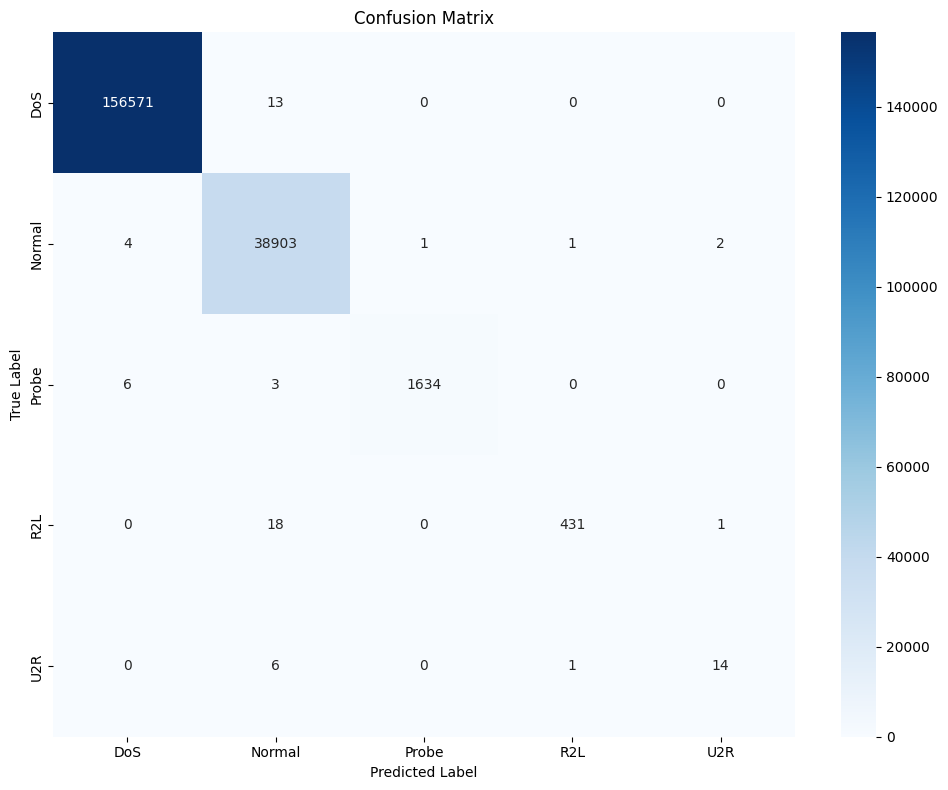

In [3]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preprocessing
col_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"
]

df = pd.read_csv("kddcup.data_10_percent", header=None, names=col_names)
df['label'] = df['label'].str.strip('.')
label_cols = ['protocol_type', 'service', 'flag']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])
attack_mapping = {
    'neptune': 'DoS', 'back': 'DoS', 'smurf': 'DoS', 'pod': 'DoS',
    'teardrop': 'DoS', 'land': 'DoS', 'satan': 'Probe', 'ipsweep': 'Probe',
    'nmap': 'Probe', 'portsweep': 'Probe', 'guess_passwd': 'R2L', 'ftp_write': 'R2L',
    'imap': 'R2L', 'multihop': 'R2L', 'phf': 'R2L', 'warezmaster': 'R2L',
    'warezclient': 'R2L', 'spy': 'R2L', 'buffer_overflow': 'U2R', 'loadmodule': 'U2R',
    'perl': 'U2R', 'rootkit': 'U2R', 'normal': 'Normal'
}
df['attack_category'] = df['label'].map(attack_mapping)
df = df.dropna(subset=['attack_category'])
X = df.drop(columns=['attack_category', 'label'])
y = df['attack_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# Remove constant features (based on previous output)
constant_features = ['urgent', 'num_outbound_cmds', 'is_host_login']
X_train = X_train.drop(columns=constant_features)
X_test = X_test.drop(columns=constant_features)

# Apply the 13 selected features from your last run
ensemble_selected_features = ['logged_in', 'dst_host_srv_diff_host_rate', 'dst_bytes', 'num_failed_logins', 'root_shell', 'is_guest_login', 'service', 'dst_host_count', 'srv_diff_host_rate', 'src_bytes', 'dst_host_diff_srv_rate', 'count', 'diff_srv_rate']
X_train_selected = X_train[ensemble_selected_features].copy()
X_test_selected = X_test[ensemble_selected_features].copy()

# 2. Train Random Forest
print("Training Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train_selected, y_train)

# 3. Predict and Evaluate
y_pred = rf.predict(X_test_selected)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()




Safe SMOTE Sampling Strategy:
{'Probe': 12320, 'R2L': 6760, 'U2R': 620}

Removed 3128 outliers (1.0002%)
Outlier distribution by class:
attack_category
Probe     1229
Normal    1196
R2L        375
DoS        259
U2R         69
Name: count, dtype: int64

Enhanced Classification Report (4 decimal precision):
              precision    recall  f1-score   support

         DoS     1.0000    0.9999    0.9999    156584
      Normal     0.9984    0.9997    0.9990     38911
       Probe     0.9994    0.9897    0.9945      1643
         R2L     0.9906    0.9378    0.9635       450
         U2R     0.7143    0.7143    0.7143        21

    accuracy                         0.9996    197609
   macro avg     0.9405    0.9283    0.9342    197609
weighted avg     0.9996    0.9996    0.9996    197609



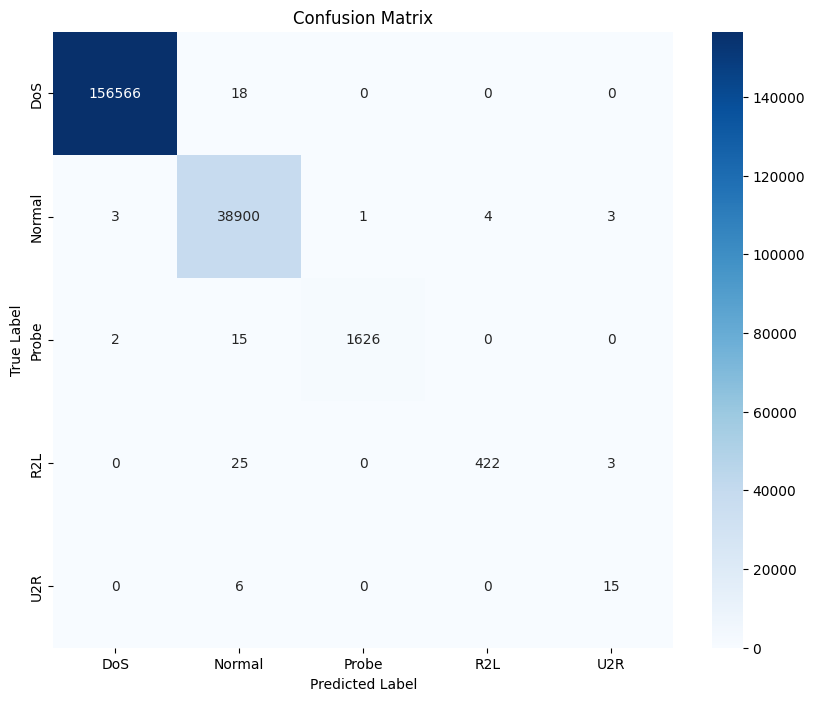


Overall Accuracy: 0.9996
DoS Class Accuracy: 0.9999
Normal Class Accuracy: 0.9997
Probe Class Accuracy: 0.9897
R2L Class Accuracy: 0.9378
U2R Class Accuracy: 0.7143


In [6]:
import pandas as pd
import numpy as np
from imblearn.combine import SMOTETomek
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================
# 0. LOAD YOUR DATA (assuming X_train, y_train, X_test, y_test exist)
# ==============================================

# If you don't have final_enhanced_features, use these 13 important features:
final_enhanced_features = [
    'logged_in', 'dst_host_srv_diff_host_rate', 'dst_bytes', 
    'num_failed_logins', 'root_shell', 'is_guest_login', 'service',
    'dst_host_count', 'srv_diff_host_rate', 'src_bytes',
    'dst_host_diff_srv_rate', 'count', 'diff_srv_rate'
]

# ==============================================
# 1. IMPROVED SMOTE WITH ADAPTIVE SAMPLING
# ==============================================
def calculate_sampling_strategy(y_train):
    """Safer sampling strategy that won't over-generate synthetic samples"""
    class_counts = y_train.value_counts()
    normal_count = class_counts['Normal']
    
    # Conservative multipliers (prevents over-generation)
    sampling_strategy = {
        'Probe': min(int(normal_count * 0.5), class_counts['Probe'] * 5),  # Max 5x original
        'R2L': min(int(normal_count * 0.2), class_counts['R2L'] * 10),     # Max 10x original
        'U2R': min(int(normal_count * 0.05), class_counts['U2R'] * 20)     # Max 20x original
    }
    print("\nSafe SMOTE Sampling Strategy:")
    print(sampling_strategy)
    return sampling_strategy

sampling_strategy = calculate_sampling_strategy(y_train)
smote_tomek = SMOTETomek(
    sampling_strategy=sampling_strategy,
    random_state=42,
    n_jobs=-1
)
X_train_smote, y_train_smote = smote_tomek.fit_resample(X_train[final_enhanced_features], y_train)
X_train_smote = pd.DataFrame(X_train_smote, columns=final_enhanced_features)

# ==============================================
# 2. SAFE OUTLIER REMOVAL
# ==============================================
def safe_remove_outliers(X, y, contamination=0.01):
    """Remove only extreme outliers while preserving attack patterns"""
    iso = IsolationForest(contamination=contamination, random_state=42)
    outlier_mask = iso.fit_predict(X) == 1
    
    removed_outliers = len(X) - sum(outlier_mask)
    removal_percentage = (removed_outliers / len(X)) * 100
    print(f"\nRemoved {removed_outliers} outliers ({removal_percentage:.4f}%)")
    print("Outlier distribution by class:")
    print(y[~outlier_mask].value_counts())
    
    return X[outlier_mask], y[outlier_mask]

X_train_clean, y_train_clean = safe_remove_outliers(X_train_smote, y_train_smote)

# ==============================================
# 3. TRAIN MODEL WITH CLASS WEIGHTS
# ==============================================
class_weights = {
    'Normal': 1,
    'DoS': 1,
    'Probe': 5,
    'R2L': 10,
    'U2R': 20
}
sample_weight = np.array([class_weights[cls] for cls in y_train_clean])

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_clean, y_train_clean, sample_weight=sample_weight)

# ==============================================
# 4. EVALUATE (WITH 4 DECIMAL PRECISION)
# ==============================================
y_pred = rf.predict(X_test[final_enhanced_features])
y_proba = rf.predict_proba(X_test[final_enhanced_features])

# Enhanced classification report (4 decimal places)
print("\nEnhanced Classification Report (4 decimal precision):")
print(classification_report(y_test, y_pred, digits=4, output_dict=False))

# Confusion Matrix (regular)
plt.figure(figsize=(10, 8))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_mat,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=rf.classes_,
    yticklabels=rf.classes_
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Additional metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.4f}")

# Class-wise metrics (4 decimal precision)
for class_name in rf.classes_:
    class_mask = y_test == class_name
    class_accuracy = accuracy_score(y_test[class_mask], y_pred[class_mask])
    print(f"{class_name} Class Accuracy: {class_accuracy:.4f}")